# Finetune your Neural Network

**Exercise objectives:**
- `Finetune` the model optimizer
- `Save` and `Load` a `trained neural network`

<hr>

Now that you have solid foundations of what Neural Networks, how to design their architecture and how to regularize them, let's take a closer look at the `.compile(loss = ..., metrics = ..., activation = ...)` part.

# Data

We will use the data from the `Boston Housing dataset`. 

Our goal is to `predict the values of the houses` (in k USD), and we will measure our models' performances  using the `Mean Absolute Error` metrics

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import boston_housing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot:ylabel='Count'>

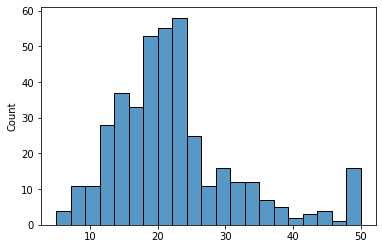

In [2]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
X_train.shape
sns.histplot(y_train)

In [3]:
pd.DataFrame(X_train).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


In [4]:
pd.DataFrame(X_train).describe()
pred = pd.DataFrame(X_train).mean()
print(pred)

0       3.745111
1      11.480198
2      11.104431
3       0.061881
4       0.557356
5       6.267082
6      69.010644
7       3.740271
8       9.440594
9     405.898515
10     18.475990
11    354.783168
12     12.740817
dtype: float64


❓ **Question** ❓ Standardize `X_train` and `X_test` set without data leakage, and replace them keeping similar variable names

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)

[[-0.27224633 -0.48361547 -0.43576161 ...  1.14850044  0.44807713
   0.8252202 ]
 [-0.40342651  2.99178419 -1.33391162 ... -1.71818909  0.43190599
  -1.32920239]
 [ 0.1249402  -0.48361547  1.0283258  ...  0.78447637  0.22061726
  -1.30850006]
 ...
 [-0.40202987  0.99079651 -0.7415148  ... -0.71712291  0.07943894
  -0.67776904]
 [-0.17292018 -0.48361547  1.24588095 ... -1.71818909 -0.98764362
   0.42083466]
 [-0.40422614  2.04394792 -1.20161456 ... -1.30866202  0.23317118
  -1.15392266]]


❓ **Question** ❓ To get a sense of a benchmark score you have to beat, what is the mean absolute error on the test set if your dumb prediction corresponds to the mean value of $y$ computed on the train set?

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# calcul de la moyenne de y du train set
y_train_mean = y_train.mean()

# faire la prédiction du test set avec y_train_mean
y_test_pred = np.ones(y_test.shape) * y_train_mean

# Calcul de la MAE sur le test set
mae = mean_absolute_error(y_test, y_test_pred)
print("MAE: ", mae)



MAE:  6.533042127742185


# 1. The model

❓ **Question** ❓ Now, write a function `initialize_model` that generates a neural network with 3 layers: 
- a layer with 10 neurons and the `relu` activation function (choose the appropriate input dimension)
- a layer with 7 neurons and the `relu` activation function
- an appropriate layer corresponding to the problem at hand

In [7]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow import keras
from keras.layers import Dense, Activation
from keras.models import Sequential

def initialize_model():
    model = Sequential()
    model.add(Dense(10, input_dim=13, activation='relu'))
    model.add(Dense(7, input_dim=13, activation='relu'))
    model.add(Dense(1, 'relu'))
    
    return model

model = initialize_model()
model

# 2. The optimizer

❓ **Question** ❓ Write a function that :
* takes as arguments a model and an optimizer, 
* `compiles` the model,
* and returns the compiled model

Please select the `loss function` to be optimized and  the `metrics` on which the model should be evaluated wisely.

In [8]:
def compile_model(model, optimizer_name):
    model.compile(loss='mse', optimizer=optimizer_name, metrics= ['mae']) 
    return model

compile_model(model, 'adam')
model.fit(X_train, y_train, epochs=200)
print(model.summary())

Epoch 1/200
13/13 [==============================] - 1s 1ms/step - loss: 577.5433 - mae: 22.1699
Epoch 2/200
13/13 [==============================] - 0s 1ms/step - loss: 571.9853 - mae: 22.0416
Epoch 3/200
13/13 [==============================] - 0s 1ms/step - loss: 565.3459 - mae: 21.8843
Epoch 4/200
13/13 [==============================] - 0s 2ms/step - loss: 556.7142 - mae: 21.6810
Epoch 5/200
13/13 [==============================] - 0s 2ms/step - loss: 546.5627 - mae: 21.4403
Epoch 6/200
13/13 [==============================] - 0s 1ms/step - loss: 535.6338 - mae: 21.1704
Epoch 7/200
13/13 [==============================] - 0s 2ms/step - loss: 522.6882 - mae: 20.8565
Epoch 8/200
13/13 [==============================] - 0s 1ms/step - loss: 508.2989 - mae: 20.5121
Epoch 9/200
13/13 [==============================] - 0s 2ms/step - loss: 491.9899 - mae: 20.1179
Epoch 10/200
13/13 [==============================] - 0s 2ms/step - loss: 472.6956 - mae: 19.6710
Epoch 11/200
13/13 [=========

13/13 [==============================] - 0s 998us/step - loss: 19.3082 - mae: 3.1604
Epoch 86/200
13/13 [==============================] - 0s 1ms/step - loss: 19.1006 - mae: 3.1455
Epoch 87/200
13/13 [==============================] - 0s 1ms/step - loss: 18.9327 - mae: 3.1284
Epoch 88/200
13/13 [==============================] - 0s 1ms/step - loss: 18.7749 - mae: 3.1091
Epoch 89/200
13/13 [==============================] - 0s 1ms/step - loss: 18.6105 - mae: 3.0962
Epoch 90/200
13/13 [==============================] - 0s 1ms/step - loss: 18.4193 - mae: 3.0809
Epoch 91/200
13/13 [==============================] - 0s 1ms/step - loss: 18.3080 - mae: 3.0756
Epoch 92/200
13/13 [==============================] - 0s 1ms/step - loss: 18.1294 - mae: 3.0662
Epoch 93/200
13/13 [==============================] - 0s 1ms/step - loss: 17.9298 - mae: 3.0444
Epoch 94/200
13/13 [==============================] - 0s 1ms/step - loss: 17.8029 - mae: 3.0317
Epoch 95/200
13/13 [==============================]

13/13 [==============================] - 0s 1ms/step - loss: 10.4289 - mae: 2.3882
Epoch 170/200
13/13 [==============================] - 0s 1ms/step - loss: 10.3430 - mae: 2.3764
Epoch 171/200
13/13 [==============================] - 0s 1000us/step - loss: 10.3127 - mae: 2.3767
Epoch 172/200
13/13 [==============================] - 0s 1ms/step - loss: 10.2486 - mae: 2.3688
Epoch 173/200
13/13 [==============================] - 0s 1000us/step - loss: 10.2180 - mae: 2.3624
Epoch 174/200
13/13 [==============================] - 0s 1ms/step - loss: 10.1554 - mae: 2.3537
Epoch 175/200
13/13 [==============================] - 0s 1000us/step - loss: 10.1278 - mae: 2.3487
Epoch 176/200
13/13 [==============================] - 0s 1ms/step - loss: 10.0931 - mae: 2.3463
Epoch 177/200
13/13 [==============================] - 0s 1ms/step - loss: 10.0488 - mae: 2.3464
Epoch 178/200
13/13 [==============================] - 0s 1ms/step - loss: 9.9902 - mae: 2.3395
Epoch 179/200
13/13 [===============

❓ **Question** ❓ Initialize the model, compile it with the `adam` optimizer and fit it on the data. 
- Evaluate your model using an Early Stopping criterion.

In [9]:
from tensorflow.keras.callbacks import EarlyStopping


stop = EarlyStopping(monitor='val_loss', patience=10,  mode= 'min')

model.fit(X_train, y_train, epochs=200, validation_split=0.3, callbacks=[stop])


Epoch 1/200
9/9 [==============================] - 0s 26ms/step - loss: 7.8175 - mae: 2.1837 - val_loss: 12.3998 - val_mae: 2.3896
Epoch 2/200
9/9 [==============================] - 0s 4ms/step - loss: 7.7900 - mae: 2.1668 - val_loss: 12.5365 - val_mae: 2.3977
Epoch 3/200
9/9 [==============================] - 0s 6ms/step - loss: 7.7377 - mae: 2.1560 - val_loss: 12.6442 - val_mae: 2.4076
Epoch 4/200
9/9 [==============================] - 0s 6ms/step - loss: 7.6965 - mae: 2.1505 - val_loss: 12.6726 - val_mae: 2.4152
Epoch 5/200
9/9 [==============================] - 0s 6ms/step - loss: 7.6568 - mae: 2.1464 - val_loss: 12.7338 - val_mae: 2.4241
Epoch 6/200
9/9 [==============================] - 0s 6ms/step - loss: 7.6162 - mae: 2.1433 - val_loss: 12.7724 - val_mae: 2.4340
Epoch 7/200
9/9 [==============================] - 0s 6ms/step - loss: 7.5834 - mae: 2.1389 - val_loss: 12.8272 - val_mae: 2.4434
Epoch 8/200
9/9 [==============================] - 0s 5ms/step - loss: 7.5696 - mae: 2.13

❓ **Question** ❓ Re-run the same model on the same data using different optimizers (in a `for` loop). 

For each optimizer, plot the history and report the corresponding Mean Absolute Error. (see [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)), as well as the time it took to fit your Neural Net.

In [10]:
def plot_loss_mae(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=200)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    
    
    ax2.plot(history.history['mae'])
    ax2.plot(history.history['val_mae'])
    ax2.set_title('MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=20)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)    

    plt.show()

def plot_loss_mse(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=20)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    

    
    ax2.plot(history.history['mse'])
    ax2.plot(history.history['val_mse'])
    ax2.set_title('MSE')
    ax2.set_ylabel('MSE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=200)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)    

    plt.show()

4/4 [==============================] - 0s 2ms/step - loss: 16.9965 - mae: 2.7409
MAE with the rmsprop optimizer: 2.7409  reached in 13 s after 248 epochs


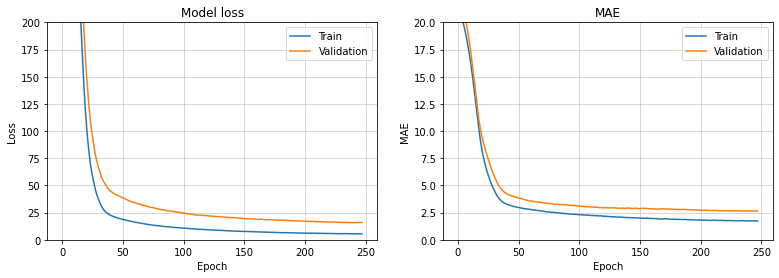

4/4 [==============================] - 0s 1ms/step - loss: 20.6396 - mae: 3.0365
MAE with the adam optimizer: 3.0365  reached in 10 s after 181 epochs


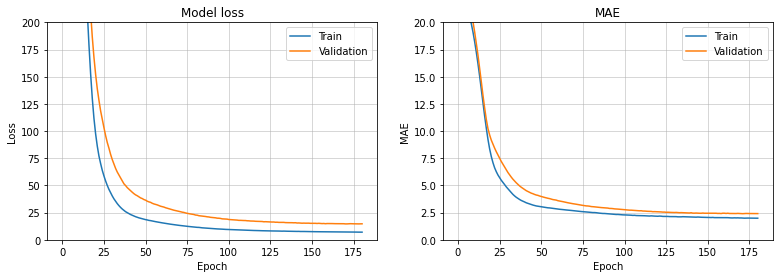

4/4 [==============================] - 0s 2ms/step - loss: 335.1832 - mae: 15.9189
MAE with the adagrad optimizer: 15.9189  reached in 24 s after 500 epochs


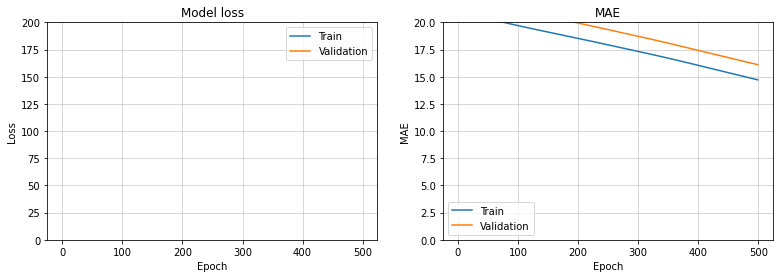

In [11]:
import time

for optimizer in ['rmsprop', 'adam', 'adagrad']:
    start_time = time.time()
    model = initialize_model()
    model = compile_model(model, optimizer)

    es = EarlyStopping(patience=10, restore_best_weights=True)

    history = model.fit(X_train, y_train, 
                      batch_size=16, 
                      epochs=500, 
                      validation_split=0.3,
                      callbacks=[es], verbose=0)

    res = model.evaluate(X_test, y_test)[1]
    end_time = time.time()

    print(f'MAE with the {optimizer} optimizer: {res:.4f}  reached in {(end_time - start_time):.0f} s after {len(history.epoch)} epochs')
    plot_loss_mae(history)
    

    
print (history)

❓ **Question** ❓ Are your predictions better than the benchmark model you've evaluated at the beginning of the notebook?

❗ **Remark** ❗ 
- Here, the optimizer is may not be central as the data are in low dimensions and and there are not many samples. However, in practice, you are advised to start with the `adam` optimizer by default which often works best. 

- Internally, when you call any optimizer with a string, the neural network initializes the hyperparameters the optimizer relies on. Among this hyperparameters, there is quite an important one, the **`learning rate`**. This learning rate corresponds to the intensity of change of the weights at each optimization of the neural network. Different learning rates have different consequences, as shown here : 

<img src="learning_rate.png" alt="Learning rate" style="height:350px;"/>


As the learning rate is initialized with default values when you compile the model optimizer with a string, let's see how to do it differently.


❓ **Question** ❓ Instead of initializing the optimizer with a string, we will initialize a real optimizer directly. Look at the documentation of [adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and instantiate it with a learning rate of $0.1$ - keep the other values to their default values. Use this optimizer in the `compile_model` function, fit the data and plot the history

In [12]:
from keras.optimizers import Adam

def compile_model(model, optimizer_name):
    model.compile(loss='mse', optimizer=optimizer_name, metrics= ['mae']) 
    return model

optimizer = Adam(lr=0.1)
compile_model(model, optimizer)

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


❓ **Question** ❓ Now, reproduce the same plots and results but for different learning rates.

*Remark*: There is a chance that the y-axis is too large for you to visualize the results. In that case, rewrite the plot function to plot only the epochs > 10.

4/4 [==============================] - 0s 2ms/step - loss: 21.7831 - mae: 3.6112
MAE with the <keras.optimizers.optimizer_v2.adam.Adam object at 0x0000025B0BB99C40> optimizer: 3.6112  reached in 25 s after 500 epochs


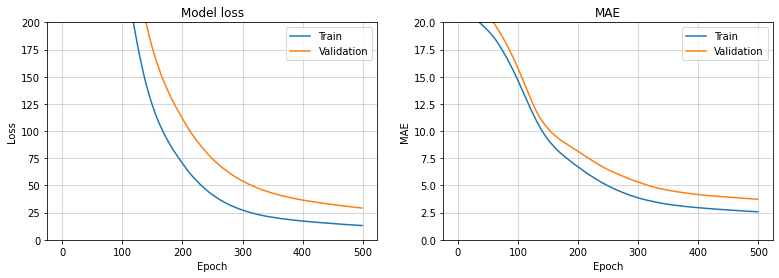

4/4 [==============================] - 0s 3ms/step - loss: 22.0993 - mae: 3.1381
MAE with the <keras.optimizers.optimizer_v2.adam.Adam object at 0x0000025B0CD64FD0> optimizer: 3.1381  reached in 12 s after 228 epochs


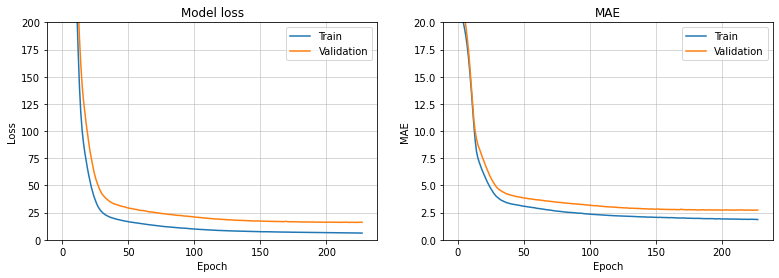

4/4 [==============================] - 0s 3ms/step - loss: 615.8578 - mae: 23.0784
MAE with the <keras.optimizers.optimizer_v2.adam.Adam object at 0x0000025B0D1A7FD0> optimizer: 23.0784  reached in 1 s after 11 epochs


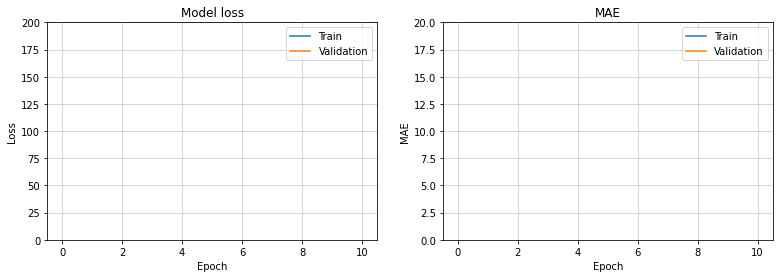

4/4 [==============================] - 0s 3ms/step - loss: 19.7040 - mae: 2.8947
MAE with the <keras.optimizers.optimizer_v2.adam.Adam object at 0x0000025B0E55BC40> optimizer: 2.8947  reached in 2 s after 25 epochs


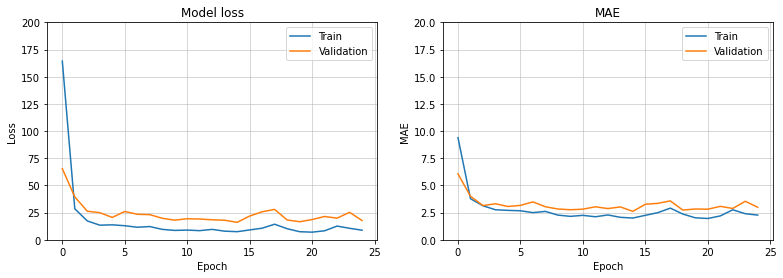

4/4 [==============================] - 0s 1ms/step - loss: 615.8578 - mae: 23.0784
MAE with the <keras.optimizers.optimizer_v2.adam.Adam object at 0x0000025B0E74DC40> optimizer: 23.0784  reached in 1 s after 11 epochs


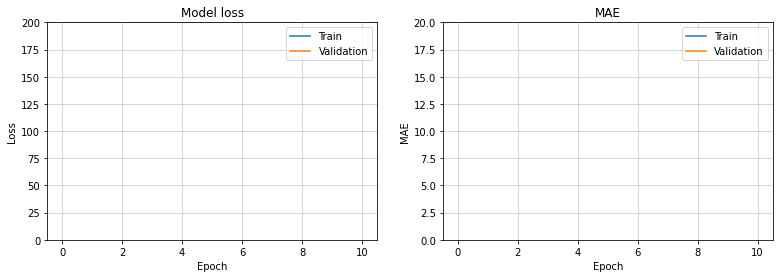

4/4 [==============================] - 0s 1ms/step - loss: 615.8578 - mae: 23.0784
MAE with the <keras.optimizers.optimizer_v2.adam.Adam object at 0x0000025B094533D0> optimizer: 23.0784  reached in 1 s after 11 epochs


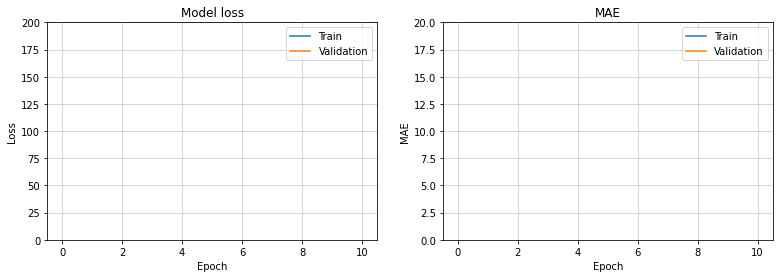

In [13]:
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 5]

for lr in learning_rates:
    optimizer = Adam(lr=lr)
    start_time = time.time()
    model = initialize_model()
    model = compile_model(model, optimizer)

    es = EarlyStopping(patience=10, restore_best_weights=True)

    history = model.fit(X_train, y_train, 
                      batch_size=16, 
                      epochs=500, 
                      validation_split=0.3,
                      callbacks=[es], verbose=0)

    res = model.evaluate(X_test, y_test)[1]
    end_time = time.time()

    print(f'MAE with the {optimizer} optimizer: {res:.4f}  reached in {(end_time - start_time):.0f} s after {len(history.epoch)} epochs')
    plot_loss_mae(history)
   

# 3. The loss

⚠️ It is important to **clearly understand the different between metrics and losses**. 

* The `loss functions` are computed *during* the training procedure
* The `metrics` are computed *after* training your models !
* Some metrics can be used as loss functions too... as long as they are differentiable ! (e.g. the *MSE*)

❓ **Question** ❓ Run the same neural network, once with the `mae` as the loss, and once with the `mse`.  

In both case, compare `mae_train`, `mae_val`, `mse_train`, `mse_val` and conclude.

MAE - Train: 21.9688, Validation: 23.3803
MSE - Train: 558.3328, Validation: 650.4835


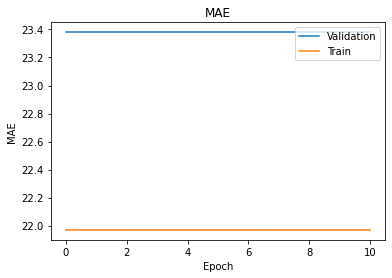

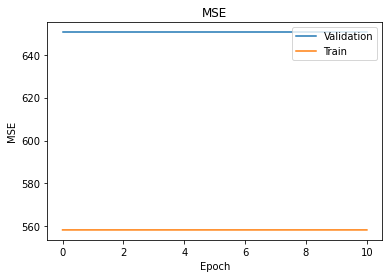

In [18]:
optimizer = Adam(lr=0.1)
es = EarlyStopping(patience=10, restore_best_weights=True)

# Execute le modèle avec "mae" comme loss fonction
model.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=['mae'])
history_mae = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.3, callbacks=[es], verbose=0)

# Execute le modèle avec "mse" comme loss fonction
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
history_mse = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.3, callbacks=[es], verbose=0)

# Compare les performances d'entrainement et de validation
mae_train_mae, mae_val_mae = history_mae.history['mae'], history_mae.history['val_mae']
mse_train_mse, mse_val_mse = history_mse.history['mse'], history_mse.history['val_mse']

print(f'MAE - Train: {mae_train_mae[-1]:.4f}, Validation: {mae_val_mae[-1]:.4f}')
print(f'MSE - Train: {mse_train_mse[-1]:.4f}, Validation: {mse_val_mse[-1]:.4f}')

plt.plot(history_mae.history['val_mae'], label='val_mae')
plt.plot(history_mae.history['mae'], label='mae')
plt.title('MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Validation', 'Train'], loc='upper right')
plt.show()

plt.plot(history_mse.history['val_mse'], label='val_mse')
plt.plot(history_mse.history['mse'], label='mse')
plt.title('MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Validation', 'Train'], loc='upper right')
plt.show()

❗️ Countrary to first intuition, it can be sometimes better to use the MSE as the loss function in order to get the best MAE possible in the end!

<details>
    <summary>▶ Why?</summary>

Well, even the Deep Learning research community is still trying to answer these types of questions rigorously.
    
One thing for sure: In Deep Learning, you will never really reach the "global minimum" of the true loss function (the one computed using your entire training set as one single "batch"). So, in your first model (minimizing the MAE loss), your global MAE minimum has clearly **not** been reached (otherwise you could never beat it). 

Why? It may well be that the minimization process of the second model has performed better. Maybe because the loss function "energy map" is "smoother" or more "convex" in the case of MSE loss? Or maybe your hyper-parameter are best suited to the MSE than to the MAE loss?

</details>

### 🧪 Test your model best performance

❓ Save your best model performance on the test set at `mae_test` and check it out below

In [15]:
# import des librairies
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mae'])

# Definie un ModelCheckpoint pour sauvegarder le meilleur modèle des jeux de test
checkpointer = ModelCheckpoint(filepath='best_model.h5', 
                               verbose=1, save_best_only=True, 
                               monitor='val_mae', mode='min')


history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[checkpointer])

Epoch 1/100
 1/13 [=>............................] - ETA: 7s - loss: 21.3500 - mae: 21.3500
Epoch 1: val_mae improved from inf to 23.07843, saving model to best_model.h5
13/13 [==============================] - 1s 15ms/step - loss: 22.3950 - mae: 22.3950 - val_loss: 23.0784 - val_mae: 23.0784
Epoch 2/100
 1/13 [=>............................] - ETA: 0s - loss: 19.5094 - mae: 19.5094
Epoch 2: val_mae did not improve from 23.07843
13/13 [==============================] - 0s 4ms/step - loss: 22.3950 - mae: 22.3950 - val_loss: 23.0784 - val_mae: 23.0784
Epoch 3/100
 1/13 [=>............................] - ETA: 0s - loss: 23.1844 - mae: 23.1844
Epoch 3: val_mae did not improve from 23.07843
13/13 [==============================] - 0s 4ms/step - loss: 22.3951 - mae: 22.3951 - val_loss: 23.0784 - val_mae: 23.0784
Epoch 4/100
 1/13 [=>............................] - ETA: 0s - loss: 22.6531 - mae: 22.6531
Epoch 4: val_mae did not improve from 23.07843
13/13 [==============================] - 0s

Epoch 32/100
 1/13 [=>............................] - ETA: 0s - loss: 22.3781 - mae: 22.3781
Epoch 32: val_mae did not improve from 23.07843
13/13 [==============================] - 0s 4ms/step - loss: 22.3950 - mae: 22.3950 - val_loss: 23.0784 - val_mae: 23.0784
Epoch 33/100
 1/13 [=>............................] - ETA: 0s - loss: 21.7687 - mae: 21.7687
Epoch 33: val_mae did not improve from 23.07843
13/13 [==============================] - 0s 4ms/step - loss: 22.3950 - mae: 22.3950 - val_loss: 23.0784 - val_mae: 23.0784
Epoch 34/100
 1/13 [=>............................] - ETA: 0s - loss: 21.3031 - mae: 21.3031
Epoch 34: val_mae did not improve from 23.07843
13/13 [==============================] - 0s 3ms/step - loss: 22.3951 - mae: 22.3951 - val_loss: 23.0784 - val_mae: 23.0784
Epoch 35/100
 1/13 [=>............................] - ETA: 0s - loss: 21.1844 - mae: 21.1844
Epoch 35: val_mae did not improve from 23.07843
13/13 [==============================] - 0s 3ms/step - loss: 22.395

 1/13 [=>............................] - ETA: 0s - loss: 22.9375 - mae: 22.9375
Epoch 63: val_mae did not improve from 23.07843
13/13 [==============================] - 0s 4ms/step - loss: 22.3951 - mae: 22.3951 - val_loss: 23.0784 - val_mae: 23.0784
Epoch 64/100
 1/13 [=>............................] - ETA: 0s - loss: 23.7594 - mae: 23.7594
Epoch 64: val_mae did not improve from 23.07843
13/13 [==============================] - 0s 4ms/step - loss: 22.3950 - mae: 22.3950 - val_loss: 23.0784 - val_mae: 23.0784
Epoch 65/100
 1/13 [=>............................] - ETA: 0s - loss: 23.4312 - mae: 23.4312
Epoch 65: val_mae did not improve from 23.07843
13/13 [==============================] - 0s 4ms/step - loss: 22.3951 - mae: 22.3951 - val_loss: 23.0784 - val_mae: 23.0784
Epoch 66/100
 1/13 [=>............................] - ETA: 0s - loss: 22.5969 - mae: 22.5969
Epoch 66: val_mae did not improve from 23.07843
13/13 [==============================] - 0s 4ms/step - loss: 22.3950 - mae: 22.3

 1/13 [=>............................] - ETA: 0s - loss: 21.5875 - mae: 21.5875
Epoch 94: val_mae did not improve from 23.07843
13/13 [==============================] - 0s 3ms/step - loss: 22.3951 - mae: 22.3951 - val_loss: 23.0784 - val_mae: 23.0784
Epoch 95/100
 1/13 [=>............................] - ETA: 0s - loss: 22.4688 - mae: 22.4688
Epoch 95: val_mae did not improve from 23.07843
13/13 [==============================] - 0s 3ms/step - loss: 22.3950 - mae: 22.3950 - val_loss: 23.0784 - val_mae: 23.0784
Epoch 96/100
 1/13 [=>............................] - ETA: 0s - loss: 23.3219 - mae: 23.3219
Epoch 96: val_mae did not improve from 23.07843
13/13 [==============================] - 0s 3ms/step - loss: 22.3951 - mae: 22.3951 - val_loss: 23.0784 - val_mae: 23.0784
Epoch 97/100
 1/13 [=>............................] - ETA: 0s - loss: 25.1313 - mae: 25.1313
Epoch 97: val_mae did not improve from 23.07843
13/13 [==============================] - 0s 3ms/step - loss: 22.3950 - mae: 22.3

# 4 : Save and load a model

❓ **Question** ❓  Save your model using `.save_model(model, 'name_of_my_model')` method that you can find [here](https://www.tensorflow.org/api_docs/python/tf/keras/models/save_model)..

❓ **Question** ❓ Now, in a variable that you will call `loaded_model`, load the model you just saved thanks to `.load_model('name_of_your_model')` [(documentation here)](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model), and evaluate it on the test data to check that it gives the same result as before.

In [16]:
best_model = load_model('best_model.h5')
test_mae = best_model.evaluate(X_test, y_test, verbose=0)[1]
print(f'Best MAE on test set: {test_mae:.4f}')

Best MAE on test set: 23.0784


## (Optional) `Exponential Decay` for the Optimizer's Learning Rate

The next question is not essential and can be skipped as many algorithms can be run without such optimization. 

Instead of keeping a fixed learning rate, you can change it from one iteration to the other, with the intuition that at first, you need large learning rates, and as the neural network converges and get closer to the minimum loss value, you can decrease the value of the learning rate. This is called a **`scheduler`**. 

❓ **Question** ❓ Use the [Exponential Decay Scheduler](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/ExponentialDecay) in the `adam` optimizer and run it on the previous data. Start with the following:

```python
initial_learning_rate = 0.001 # start with default ADAM value

lr_schedule = ExponentialDecay(
    # Every 5000 iterations, multiply the learning rate by 0.7
    initial_learning_rate, decay_steps=5000, decay_rate=0.7,
)
```

In [17]:
# YOUR CODE HERE